<div class="alert alert-block alert-info">
<h3>Student Information</h3> Please provide information about yourself. We will NOT grade this submissing w/o all the information<br>
<b>Name</b>: Vinh Huynh<br>
<b>NetID</b>: vbh11<br>
<b>Recitation (01/02)</b>: 02<br>
<b>Notes to Grader</b> (optional):<br>
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://www.cs.rutgers.edu/academic-integrity/introduction">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b>: VH     (eg: DS for Deeptanshu Singh)


<h3>Grader Notes</h3>
<b>Your Grade<b>:<br>
<b>Grader Initials</b>:<br>
<b>Grader Comments</b> (optional):<br>
</div>

## CS 439 - Introduction to Data Science
### Spring 2019

# Lab 3: Data Cleaning and Visualization

### Due Date: Sunday February 17, 2019 by 11:59 PM ###

### Instructions
This lab is presented as a notebook. Please execute the cells that are already completed and your task is to fill in the code
between ### BEGIN SOLUTION ### and ### END SOLUTION ###. 

#### Important: Please do not add any new cells or change the order of cells. If you have questions, please contact the courseS staff.

In this lab, you will be working with a dataset from NYPD containing data on calls to the New York Police Department. Information about the datasets can be found https://opendata.cityofnewyork.us/

## Setup

Note that after activating matplotlib to display figures inline via the IPython magic `%matplotlib inline`, we configure a custom default figure size. Virtually every default aspect of matplotlib [can be customized](https://matplotlib.org/users/customizing.html).

In [2]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 9)
plt.show()

# Part 1:Getting Data

We will work with the NYPD Historic complaint data set. Our first task is to estimate the size of this download by looking at the number of rows, columns and using an estimated size for a column (use a reasonable value). The site metadata is available from the page
https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

In [2]:
### BEGIN SOLUTION
estimated size of the download (based on metadata information from the site) = 1.0gb
# please explain how you reached the answer
#Looking from the website there are 35 total columns and 6.05 million rows worth of information in that one page.
#Also another thing to note is that a majority of the data types are in plain text or numbers
### END SOLUTION

SyntaxError: invalid syntax (<ipython-input-2-bf017b1922c5>, line 2)

### 1.1 Download the data
This file is large (use the estimate you did above). If it takes too long to download, you may want to interrupt and download the file using a browser and URL https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

In [ ]:
import utils
data_dir = 'data'
data_url = 'https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i'

file_name = 'NYPD_Complaint_Data_Historic.csv'

# To retrieve the dataset, we will use the `utils.fetch_and_cache` utility from utils library. 
dest_path = utils.fetch_and_cache(data_url=data_url, file=file_name,data_dir=data_dir)
print(f'Located at {dest_path}')

### 1.2 Inspect the size of the file
It is helpful to get an idea of the size of the file. This can be done using functions in the utils library.

In [ ]:
# look at the size of the file w/o opening it using OS (https://docs.python.org/3/library/os.html). You can perform
# variety of operating system related functions from this package.
### BEGIN SOLUTION
import os
crimeData = os.path.getsize("data/NYPD_Complaint_Data_Historic.csv")
#This converts it from bytes to GB
crimeData = crimeData/1000000000
print(crimeData)
#This file is 1.8gb

#### END SOLUTION

### 1.3 Split the large file
This data file NYPD_Complaint_Data_Historic.csv is too big to load into a single DataFrame. Let us split the large file into smaller files.  Let us find out the number of lines in the NYPD_Complaint_Data_Historic.csv file using utils.

In [ ]:
# Using utils library, find the number of lines in the file

### BEGIN SOLUTION
import utils

csvPath = "data/NYPD_Complaint_Data_Historic.csv"
totalRows = utils.line_count(csvPath)
print(totalRows)
#6036806 Rows Total

### END SOLUTION

In [ ]:
# Split the file into 10 smaller files. Estimate the number of lines in each file using the count above
# files should be created in the data folder and named NYPD_Complaint_Data_Historic_1.csv, 
# NYPD_Complaint_Data_Historic_2.csv, ... NYPD_Complaint_Data_Historic_10.csv etc
# It is possible that few lines from the original file may not be saved due to rounding errors.

### BEGIN SOLUTION
import os
import utils
import math

csvPath = "data/NYPD_Complaint_Data_Historic.csv"
#Divide rows of big files into smaller amounts
totalRows = utils.line_count(csvPath)
fileRows = math.ceil(totalRows/10)
#print(fileRows)
csvFile = open(csvPath, 'r').readlines()
fileNum = 1

#Run ten times
for i in range(totalRows):
    if i % fileRows == 0:
        open(str(csvPath) + str(fileNum) + ".csv", 'w+').writelines(csvFile[i:i+fileRows])
        fileNum += 1


### END SOLUTION

### 1.4 Check the files in the data folder
Now, we'll use a method of the `Pathlib.Path` class called `glob` to list all files in the `data` directory. You will find useful information in pathlib [docs](https://docs.python.org/3/library/pathlib.html).

Below, we use pathlib's `glob` method to store the list of all files' names from the `data_dir` directory in the variable `file_names`. These names should be strings that contain only the file name (e.g. `dummy.txt` not `data/dummy.txt`). The asterisk (*) character is used with the `glob` method to match any string.

In [ ]:
from pathlib import Path
data_dir_path = Path('data') # creates a Path object that points to the data directory
file_names = [x.name for x in data_dir_path.glob('*') if x.is_file()]
file_names

### 1.5 Pre-processing of data
It is good to pre-process the data to see if the file can be opened in a Jupyter notebook. We need to avoid large files that can crash notebooks. Typically, files of size around 200 MB is ok to open into a DataFrame. In the following activities we will inspect the file w/o opening it as a DataFrame. Using utils.head 

In [ ]:
# Use the util.head() to read up to 5 lines from the original file (w/o opening it)
from utils import head
head('data/NYPD_Complaint_Data_Historic.csv', lines=5)


### 1.6 Inspecting and describing data columns
There should be 35 columns in each record. Using header information and data types, describe the type of data in each
column. If you are unable to determine, just state so.
##### BEGIN SOLUTION
* CMPLNT_NUM           non-null int64
* CMPLNT_FR_DT         non-null object
* CMPLNT_FR_TM         non-null object
* CMPLNT_TO_DT         non-null object
* CMPLNT_TO_TM         non-null object
* ADDR_PCT_CD          non-null float64
* RPT_DT               non-null object
* KY_CD                non-null int64
* OFNS_DESC            non-null object
* PD_CD                non-null float64
* PD_DESC              non-null object
* CRM_ATPT_CPTD_CD     non-null object
* LAW_CAT_CD           non-null object
* BORO_NM              non-null object
* LOC_OF_OCCUR_DESC    non-null object
* PREM_TYP_DESC        non-null object
* JURIS_DESC           non-null object
* JURISDICTION_CODE    non-null float64
* PARKS_NM             non-null float64
* HADEVELOPT           non-null object
* HOUSING_PSA          non-null float64
* X_COORD_CD           non-null int64
* Y_COORD_CD           non-null int64
* SUSP_AGE_GROUP       non-null object
* SUSP_RACE            non-null object
* SUSP_SEX             non-null object
* TRANSIT_DISTRICT     non-null float64
* Latitude             non-null float64
* Longitude            non-null float64
* Lat_Lon              non-null object
* PATROL_BORO          non-null object
* STATION_NAME         non-null object
* VIC_AGE_GROUP        non-null object
* VIC_RACE             non-null object
* VIC_SEX              non-null object
##### END SOLUTION

# Part 2 - Exploratory Data Analysis
Exploratory data analysis (EDA) is the process of examining a subest of a large data set to see what we can know about the data. First we will explore one file NYPD_Complaint_Data_Historic_1.csv to see what we can find out.

### 2.1 Loading Data into a DataFrame
Load the first CSV file, NYPD_Complaint_Data_Historic_1.csv into a `pandas.DataFrame` object. Also do a time analysis to see how long it took to load the data into a DataFrame. Time should be printed in seconds. The time libraries https://docs.python.org/3/library/time.html can help.

In [3]:
### BEGIN SOLUTION
import time 

start = time.time()
calls = pd.read_csv('data/NYPD_Complaint_Data_Historic.csv1.csv')
end = time.time()
print(str(end - start) + " seconds")

### END SOLUTION

16.630491018295288 seconds


### 2.2 Description of Fields
Let's also check some basic information about these files using the `DataFrame.describe` and `DataFrame.info` methods. Describe columns that can be removed based on the information.

In [12]:
### BEGIN SOLUTION
calls.info()
calls.describe()

# What columns can be removed from the DataFrame? A reasonable rule of thumb is that if a column is missing more than 
# 50% of the data then it should be removed
#The following columns can be removed:
#PARKS_NM, HADEVELOPT, HOUSING_PSA, SUSP_AGE_GROUP, SUSP_RACE, SUSP_SEX, TRANSIT_DISTRICT, STATION_NAME

### END SOLUTION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603680 entries, 0 to 603679
Data columns (total 35 columns):
CMPLNT_NUM           603680 non-null int64
CMPLNT_FR_DT         603596 non-null object
CMPLNT_FR_TM         603678 non-null object
CMPLNT_TO_DT         437506 non-null object
CMPLNT_TO_TM         437718 non-null object
ADDR_PCT_CD          603610 non-null float64
RPT_DT               603680 non-null object
KY_CD                603680 non-null int64
OFNS_DESC            601518 non-null object
PD_CD                603061 non-null float64
PD_DESC              603061 non-null object
CRM_ATPT_CPTD_CD     603678 non-null object
LAW_CAT_CD           603680 non-null object
BORO_NM              600998 non-null object
LOC_OF_OCCUR_DESC    466981 non-null object
PREM_TYP_DESC        601110 non-null object
JURIS_DESC           603680 non-null object
JURISDICTION_CODE    603061 non-null float64
PARKS_NM             0 non-null float64
HADEVELOPT           30568 non-null object
HOUSING_PSA  

,CMPLNT_NUM,ADDR_PCT_CD,KY_CD,PD_CD,JURISDICTION_CODE,PARKS_NM,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,TRANSIT_DISTRICT,Latitude,Longitude
count,6.036800e+05,603610.000000,603680.000000,603061.000000,603061.000000,0.0,47945.000000,6.036800e+05,6.036800e+05,12653.000000,603680.000000,603680.000000
mean,5.495339e+08,63.540465,293.608601,418.737595,0.567989,NaN,6354.009740,1.004826e+06,2.070357e+05,14.647831,40.734895,-73.925725
std,2.598049e+08,34.337086,144.868138,218.584291,5.693911,NaN,13306.169723,2.143111e+04,3.999402e+04,12.882101,0.108964,0.077289
min,1.000005e+08,1.000000,101.000000,101.000000,0.000000,NaN,218.000000,9.134110e+05,1.211310e+05,1.000000,40.498905,-74.254743
25%,3.248408e+08,40.000000,118.000000,254.000000,0.000000,NaN,483.000000,9.918548e+05,1.843280e+05,3.000000,40.672574,-73.972570
50%,5.493534e+08,66.000000,341.000000,397.000000,0.000000,NaN,720.000000,1.004560e+06,2.052305e+05,11.000000,40.729939,-73.926714
75%,7.742395e+08,94.000000,351.000000,637.000000,0.000000,NaN,1193.000000,1.016552e+06,2.352660e+05,30.000000,40.812424,-73.883361
max,9.999991e+08,123.000000,881.000000,969.000000,97.000000,NaN,65013.000000,1.067298e+06,7.250292e+06,34.000000,59.657274,-73.684788


### 2.2 Finding Uniques

Notice that the functions above reveal type information for the columns, as well as some basic statistics about the numerical columns found in the DataFrame. However, we still need more information about what each column represents. Let's explore the data further.

find the number of unique values in each DataFrame column and answer the questions below.

In [1]:
### BEGIN SOLUTION
calls.nunique()

# Questions
# 1. How many distinct locations where the complaints have come from?
# 12
# 2. How many age groups are represented in the data set?
# 6
# 3. How many boroughs are included in the data set?
# 5 boroughs
# 4. How many offense types are listed in this data set?
# 69

### END SOLUTION

NameError: name 'calls' is not defined

### 2.3 Offense by Boro
Using GroupBy operation, create a DataFrame that groups offenses by Boro. call the DataFrame calls_by_Boro_and_offense

In [ ]:
### BEGIN SOLUTION

#calls.loc[:, "BORO_NM"]

calls_by_Boro_and_offense = calls.groupby(['BORO_NM', 'OFNS_DESC']).size()
#type(calls_by_Boro_and_offense)
calls_by_Boro_and_offense["BRONX", "GRAND LARCENY"]
#5878 Cases of grand larceny
### END SOLUTION

In [ ]:
## Assert that in Bronx there were 6022 Grand Larceny incidents
### BEGIN SOLUTION
assert calls_by_Boro_and_offense["BRONX", "GRAND LARCENY"] == 5878
### END SOLUTION

### 2.4 Offenses in Bronx

In the cell below, find a list of strings corresponding to the possible values for `OFNS_DESC` when `BORO` is "BRONX". Create an expression that automatically extracts the names of the offenses.

In [ ]:
### BEGIN SOLUTION

calls.loc[(calls["BORO_NM"] == "BRONX"), "OFNS_DESC"].unique()
#calls.loc[(calls["BORO_NM"] == "BRONX"), "OFNS_DESC"].unique().size

### END SOLUTION

# How many offenses were committed in Bronx during the analysis period?
#53

### 2.5 Most Common Crimes in NYC

What are the five crime types of OFNS_DESC that have the most crime events in Bronx? You may need to use `value_counts` to find the answer. Save your results as a list of strings.

**Hint:** *The `keys` method of the Series class might be useful.*

In [ ]:
### BEGIN SOLUTION

calls.loc[(calls["BORO_NM"] == "BRONX"), "OFNS_DESC"].value_counts().head(5).keys()

### END SOLUTION

### 2.6 Probability of a Crime in Bronx
What is the probability that a the crime "Arson" can happen in Bronx?

In [ ]:
### BEGIN SOLUTION

bronxTotal = calls.loc[(calls["BORO_NM"]) == "BRONX", "OFNS_DESC"].count()
#bronxTotal
bronxArson = calls.loc[(calls["BORO_NM"] == "BRONX") & (calls["OFNS_DESC"] == "ARSON"), "OFNS_DESC"].count()
#bronxArson
print( str(bronxArson / bronxTotal) + " probability of arson")

### END SOLUTION

---
# Part 3: Visualizing the Data

## Pandas vs. Seaborn Plotting

Pandas offers basic functionality for plotting. For example, the `DataFrame` and `Series` classes both have a `plot` method. However, the basic plots generated by pandas are not particularly pretty. While it's possible to manually use matplotlib commands to make pandas plots look better, we'll instead use a high level plotting library called Seaborn that will take care of most of this for us.

As you learn to do data visualization, you may find the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) and [Seaborn documentation](https://seaborn.pydata.org/api.html) helpful!

### 3.1 Plotting a Series
Using the built-in plotting functionality of pandas, such as `plot` method of the `Series` class to generate a `barh` plot type,  display the value counts for `OFNS_DESC` visually as a barh chart.

In [ ]:
### BEGIN SOLUTION

plot = calls["OFNS_DESC"].value_counts().plot(kind='barh')
plot.set_ylabel('Type of Crime')
plot.set_xlabel('Numbers')
### END SOLUTION

### 3.2 Getting a Better Plot
The plot above can be messy as it plots all offenses. Plot only the offenses that has more than 10000 calls

In [17]:
### BEGIN SOLUTION

#counts = df.groupby('A')['B'].value_counts()
#counts[counts>=2]

ofences = calls.loc[:, "OFNS_DESC"].value_counts()
#higherAvg = ofences[ofences > 10000]
#type(higherAvg)
ofences[ofences > 10000].plot(kind='barh')
### END SOLUTION

pandas.core.series.Series

By contrast, the Seaborn library provides a specific function `countplot` built for plotting counts. It operates directly on the DataFrame itself i.e. there's no need to call `value_counts()` at all. This higher level approach makes it easier to work with. Use the y-label ("Crime Category"), x-label("Number of Calls") and title_of_plot("Number of Calls By Crime Type"

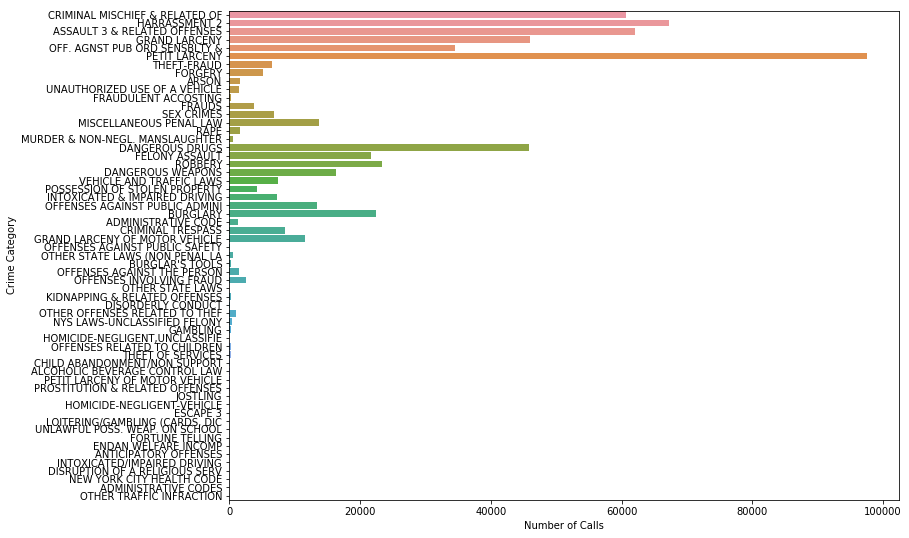

In [46]:
### BEGIN SOLUTION
ax = sns.countplot(y=calls["OFNS_DESC"], data=ofences[ofences > 10000])
ax.set(xlabel='Number of Calls', ylabel='Crime Category')
ax.set_title='Number of Calls By Crime Type'
### END SOLUTION

You may note that the ordering might be different for the seaborn plot (as compared to pandas plot). If we want the same ordering that we had in the pandas plot, we can use the order parameter of the `countplot` method. It takes a list of strings corresponding to the axis to be ordered. By passing the index of the `value_counts`, you can get the order you want.

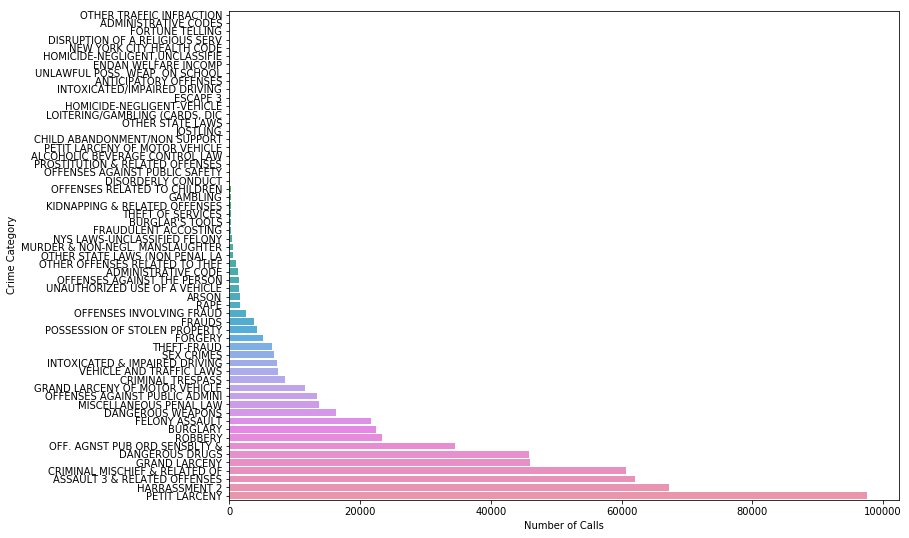

In [50]:
### BEGIN SOLUTION

ax = sns.countplot(y=calls["OFNS_DESC"], data=ofences[ofences > 10000], order=calls["OFNS_DESC"].value_counts(ascending=True).index)
ax.set(xlabel='Number of Calls', ylabel='Crime Category')
ax.set_title='Number of Calls By Crime Type'

### END SOLUTION

Now we have a pretty bar plot with the bars ordered by size. Though `seaborn` appears to provide a superior plot from a aesthetic point of view, the `pandas` plotting library is also good to understand. You'll get practice using both libraries in the following questions.

## An Additional Note on Plotting in Jupyter Notebooks

You may have noticed that many of our code cells involving plotting end with a semicolon (;). This prevents any extra output from the last line of the cell that we may not want to see. Try adding this to your own code in the following questions!

### 3.3 making more plots

Now it is your turn to make some more plots using `pandas` and `seaborn`. Let's start by looking at the distribution of calls over days of the week.

The CMPLNT_FR_DT field contains the date of the event. We would like to add a new column to the DataFrame that includes Day of the week (DAY_OF_WEEK) that indicates the day of the week. This can help us analyze the crimes on a specific day of the week. For example, we can answer questions such as "what day of the week that a LARSON is likely to happen in NYC?"


Add a new column `DAY_OF_WEEK` into the `calls` dataframe that has the day string (eg. 'Sunday') for the corresponding value in CMPLNT_FR_DT. For example, if the first 3 values of `CMPLNT_FR_DT` are `['01/27/2006, '01/28/2006, '01/29/2006]`, then the first 3 values of the `DAY_OF_WEEK` column should be `["Friday", "Saturday", "Sunday"]`.

**Hint:** *Try using the [Series.map](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) function on `calls["OFNS_DESC"]`.  Can you assign this to the new column `calls["DAY_OF_WEEK"]`?*

In [64]:
### BEGIN SOLUTION

dayConversion = pd.to_datetime(calls['CMPLNT_FR_DT']).dt.day_name()
calls['DAY_OF_WEEK'] = dayConversion
calls['DAY_OF_WEEK']

### END SOLUTION

0            Friday
1            Friday
2            Friday
3          Thursday
4          Thursday
5            Monday
6            Monday
7          Saturday
8          Thursday
9          Thursday
10        Wednesday
11          Tuesday
12           Monday
13           Friday
14         Thursday
15        Wednesday
16         Thursday
17           Monday
18           Sunday
19         Saturday
20        Wednesday
21         Thursday
22          Tuesday
23          Tuesday
24          Tuesday
25          Tuesday
26         Thursday
27         Thursday
28         Saturday
29        Wednesday
            ...    
603650      Tuesday
603651      Tuesday
603652      Tuesday
603653      Tuesday
603654      Tuesday
603655      Tuesday
603656      Tuesday
603657      Tuesday
603658      Tuesday
603659      Tuesday
603660      Tuesday
603661      Tuesday
603662      Tuesday
603663      Tuesday
603664      Tuesday
603665      Tuesday
603666      Tuesday
603667      Tuesday
603668      Tuesday


### 3.4 Seaborn plots

Create a `seaborn` plot that shows the number of calls for each day of the week. You may want to use of the `rotation` argument in `ax.set_xticklabels`, which rotates the labels by 90 degrees.

[Text(0, 0, 'Sunday'),
 Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Friday'),
 Text(0, 0, 'Saturday')]

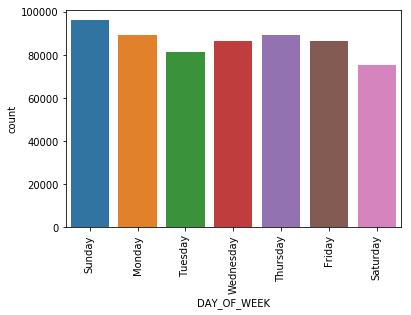

In [25]:
### BEGIN SOLUTION

days = ["Sunday","Monday","Tuesday","Wednesday", "Thursday", "Friday","Saturday"]
ax = sns.countplot(x=calls['DAY_OF_WEEK'])
ax.set_xticklabels(days, rotation=90)

### END SOLUTION

Now, let's make the same plot using `pandas`. Construct a vertical bar plot with the count of the number of calls (entries in the table) for each day of the week **ordered by the day of the week** (eg. `Sunday`, `Monday`, ...). Do not use `sns` for this plot. Be sure that your axes are labeled and that your plot is titled.

**Hint:** *Given a series `s`, and an array `coolIndex` that has the same entries as in `s.index`, `s[coolIndex]` will return a copy of the series in the same order as `coolIndex`.*

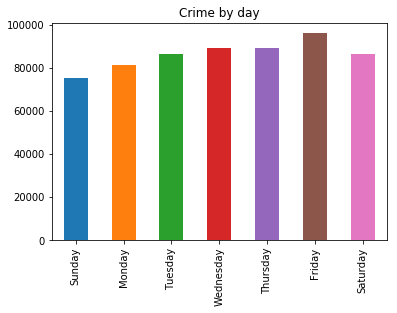

In [11]:
### BEGIN SOLUTION
days = ["Sunday","Monday","Tuesday","Wednesday", "Thursday", "Friday","Saturday"]
df = calls['DAY_OF_WEEK'].value_counts().reindex(index=days)

df.plot(kind="bar", title = "Crime by day")
### END SOLUTION

## 3.5 What Day of the Week is more calls?

Is it true that weekdays generally have slightly more calls than Saturday or Sunday? What can you say about the difference?

##### BEGIN SOLUTION

Yea, the weekdays have a slightly high rate of calls being done aroudn the later half of the weekday. 

##### END SOLUTION

We can break down into some particular types of events to see their distribution. For example, let's make a bar plot for the OFNS_DESC "HARRASSMENT 2". Which day is the peak for "HARRASSMENT 2"?

This time, use `seaborn` to create a vertical bar plot of the number of total noise violations reported on each day of the week, again ordered by the days of the week starting with Sunday. Do not use `pandas` to plot.

**Hint:** *If you're stuck, use the code for the seaborn plot in above question as a starting point.*

[Text(0, 0, 'Sunday'),
 Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Friday'),
 Text(0, 0, 'Saturday')]

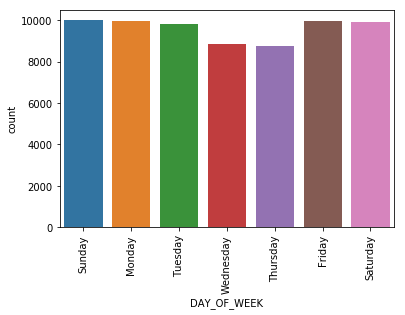

In [30]:
### BEGIN SOLUTION
days = ["Sunday","Monday","Tuesday","Wednesday", "Thursday", "Friday","Saturday"]
crime = calls[(calls["OFNS_DESC"] == "HARRASSMENT 2")]
df = crime['DAY_OF_WEEK'].value_counts().reindex(index=days)
ax = sns.countplot(x=crime['DAY_OF_WEEK'])
ax.set_xticklabels(days, rotation=90, fontdict=None, minor=False)

### END SOLUTION

### 3.6 

Do you see anything interesting about the distribution of HARRASSMENT 2 calls over a week? Type a short answer below.
##### BEGIN SOLUTION

Harrassment has a higher rate of occurences during the weekend + friday as compared to the weekday. 

##### END SOLUTION

### 3.7 More Plots

Let's look at a similar distribution but for a crime we have much more calls data about. In the cell below, create the same plot as you did in previous questions, but now looking at instances of the OFNS_DESC "BURGLARY" (instead of "HARRASSMENT 2"). Use either `pandas` or `seaborn` plotting as you desire.

[Text(0, 0, 'Sunday'),
 Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Friday'),
 Text(0, 0, 'Saturday')]

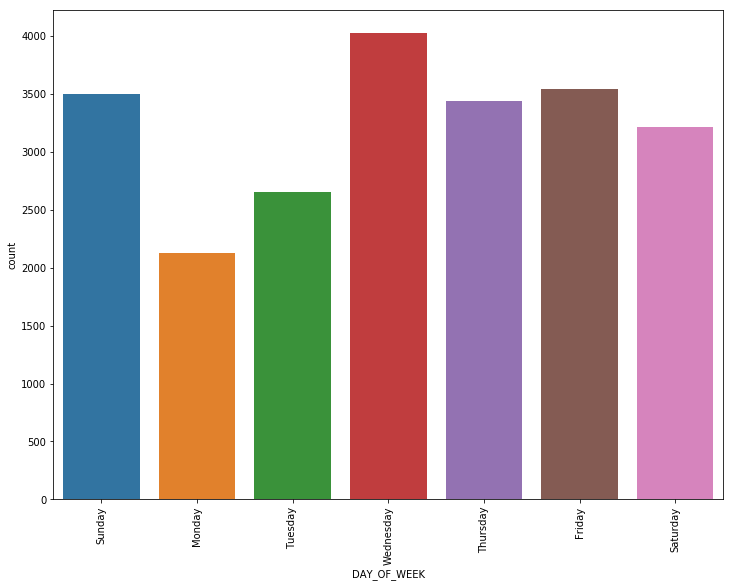

In [83]:
### BEGIN SOLUTION

days = ["Sunday","Monday","Tuesday","Wednesday", "Thursday", "Friday","Saturday"]
crime = calls[(calls["OFNS_DESC"] == "BURGLARY")]
df = crime['DAY_OF_WEEK'].value_counts().reindex(index=days)
ax = sns.countplot(x=crime['DAY_OF_WEEK'])
ax.set_xticklabels(days, rotation=90, fontdict=None, minor=False)

### END SOLUTION

### 3.8 time of events

Now let's look at the CMPLNT_TO_TM column which indicates the time for events. Since it contains hour and minute information, let's extract the hour info and create a new column named `Hour` in the `calls` dataframe. You should save the hour as an `int`. Then plot the frequency of each hour in the table (i.e., `value_counts()`) sorted by the hour of the day (i.e., `sort_index()`).

You will want to look into how to use:

* [Series.str.slice](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.slice.html#pandas.Series.str.slice) to select the substring.
* [Series.astype](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.astype.html) to change the type.

**Hint:** *The `str` helper member of a series can be used to grab substrings.  For example, `calls["CMPLNT_TO_TM"].str.slice(3,5)` returns the minute of each hour of the `CMPLNT_TO_TM`.*

Text(0.5, 1.0, 'Number of calls in the data')

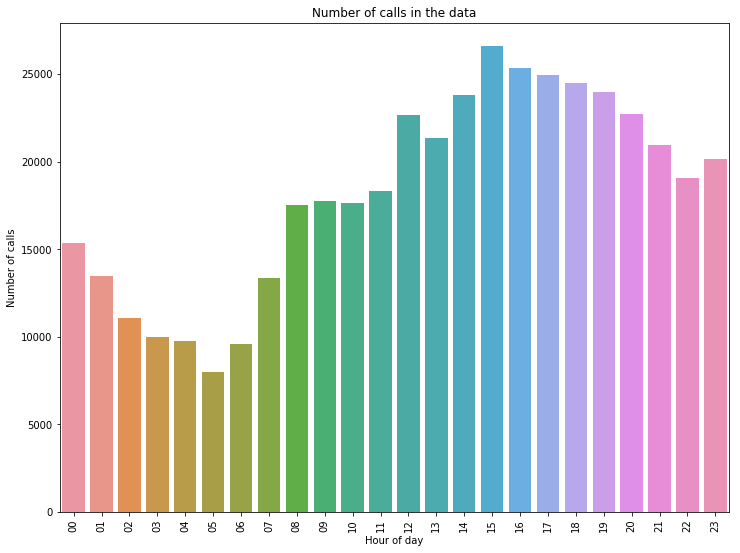

In [118]:
### BEGIN SOLUTION
hours = ["00","01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16","17","18","19","20","21","22","23"]

strCalls = calls['CMPLNT_TO_TM'].dropna().astype(str)

calls["Hour"] = strCalls.str.slice(0,2)
cleanedTimes = strCalls.str.slice(0,2).value_counts().reindex(index=hours)
#cleanedTimes

ax = sns.barplot(cleanedTimes.index, cleanedTimes.values)
ax.set_xticklabels(hours ,rotation=90)
ax.set_xlabel("Hour of day")
ax.set_ylabel("Number of calls")
ax.set_title("Number of calls in the data")
### END SOLUTION

Create a pandas bar plot showing the number of BURGLARY crimes committed at each hour of the day. Use the labels
* ax.set_xlabel("Hour of the Day")
* ax.set_ylabel("Number of Calls")
* ax.set_title("Number of Calls Reporting Fraud For Each Day of the Week");

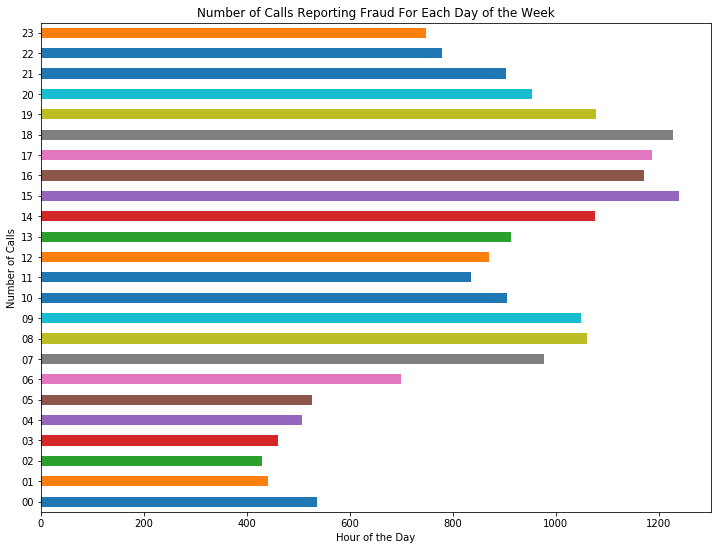

In [91]:
### BEGIN SOLUTION

days = ["Sunday","Monday","Tuesday","Wednesday", "Thursday", "Friday","Saturday"]
hours = ["00","01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16","17","18","19","20","21","22","23"]

crime = calls[(calls["OFNS_DESC"] == "BURGLARY")]
strCalls = crime['CMPLNT_TO_TM'].dropna().astype(str)
strCalls = strCalls.str.slice(0,2).value_counts().reindex(index=hours)
ax = strCalls.plot(kind="barh")
ax.set_xlabel("Hour of the Day")
ax.set_ylabel("Number of Calls")
ax.set_title("Number of Calls Reporting Fraud For Each Day of the Week");

### END SOLUTION

### 3.9 More plots

In the cell below, create a seaborn plot of the same data. Again, make sure you provide axes labels and a title for your plot.

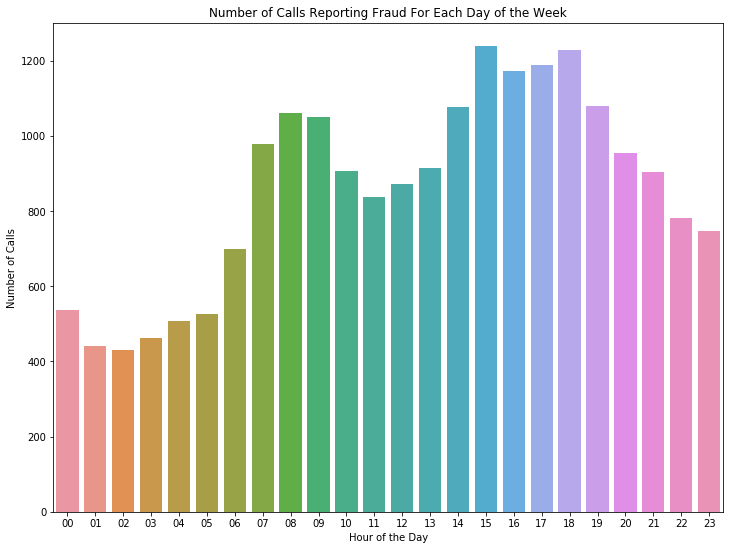

In [89]:
### BEGIN SOLUTION

days = ["Sunday","Monday","Tuesday","Wednesday", "Thursday", "Friday","Saturday"]
hours = ["00","01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16","17","18","19","20","21","22","23"]

crime = calls[(calls["OFNS_DESC"] == "BURGLARY")]
strCalls = crime['CMPLNT_TO_TM'].dropna().astype(str)
strCalls = strCalls.str.slice(0,2).value_counts().reindex(index=hours)
ax = sns.barplot(strCalls.index, strCalls.values)
ax.set_xlabel("Hour of the Day")
ax.set_ylabel("Number of Calls")
ax.set_title("Number of Calls Reporting Fraud For Each Day of the Week");
### END SOLUTION

### 3.8 Spike in burglary?

According to your plots, is there a spike in calls reporting BURGLARY at any particular time? If so, Do you trust that this spike is legitimate, or could there be an issue with our data? Explain your reasoning in 1-2 sentences below.

#### BEGIN SOLUTION

According to the graph there is a higher change for a burlary to happen between 3-6pm. One reason why there is this spike is that this time frame is when people are slowly starting to come back from work/school. Most burglaries happen during the time of the day when the homeowner is expected to be gone. 

#### END SOLUTION

In the cell below, we generate a boxplot which examines the hour of day of each crime broken down by the `OFNS_DESC` value.  To construct this plot we used the [DataFrame.boxplot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html) documentation.

In [ ]:
calls.boxplot(column="Hour", by='OFNS_DESC', rot=90);

While the pandas boxplot is informative, we can use seaborn to create a more visually-appealing plot. Using seaborn, regenerate a better box plot. See either the textbook (https://www.textbook.ds100.org/ch/06/viz_quantitative.html) or the [seaborn boxplot documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

Looking at your plot, which crime type appears to have the largest interquartile range? Put your results into `answer` as a string.

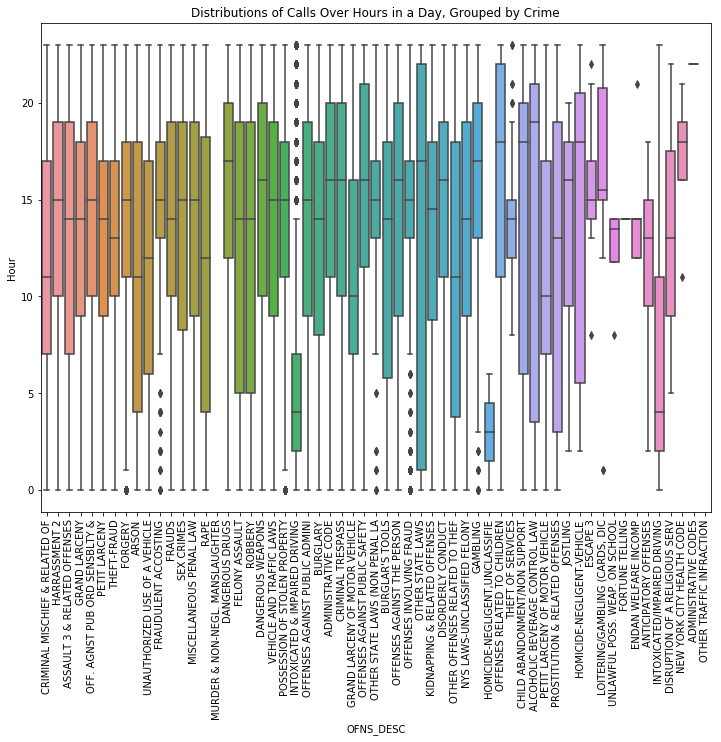

In [123]:
# Todo: Make a boxplot with seaborn
### BEGIN SOLUTION
hours = ["00","01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16","17","18","19","20","21","22","23"]

strCalls = calls['CMPLNT_TO_TM'].dropna().astype(str)
crimeCounts = calls['OFNS_DESC'].value_counts()
cleanedTimes = calls["Hour"].dropna().astype("int32")
#cleanedTimes
#calls['OFNS_DESC'].describe

ax = sns.boxplot(data=calls, x=calls["OFNS_DESC"], y=cleanedTimes)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("Distributions of Calls Over Hours in a Day, Grouped by Crime");
answer = "Crimes like other state laws, alcoholic beverage control law have the largest interquartile range"
### END SOLUTION

### 3.9 - Visualization of crimes on a Map of NYC
finally we attempt to visualize the crimes committed in NYC on a Map. First we need to installing some mapping software. run the cell below to install folium package for mapping software.

In [ ]:
!pip install --upgrade folium

In [62]:
### Plot the maps for BURGLARY in NYC
### if it takes too much time or map does not show up, try plotting a subset of the data set of for a specific crime

### BEGIN SOLUTION
import folium
import folium.plugins # The Folium Javascript Map Library

crime = calls[(calls["OFNS_DESC"] == "BURGLARY") & (calls["BORO_NM"] == "MANHATTAN")]
crime = crime[:1000]
heatMap = folium.Map(location=[40.7128, -74.0060], zoom_start=12)
crimeLat = crime["Latitude"].astype(float)
heatMap.add_child(folium.plugins.HeatMap(zip(crimeLat, crimeLon), radius=10))
#heatMap

### END SOLUTION

## Congratulations !!!

<div class="alert alert-block alert-info">
<h2>Submission Instructions</h2> 
<b> File Name:</b> Please name the file as your_section_your_netID_Lab3.jpynb<br>
<b> Submit To: </b> Canvas &rarr; Assignments &rarr; Lab3 <br>
<b>Warning:</b> Failure to follow directions may result in loss of points.<br>
</div>

Credits: Josh Hug, and Berkeley Data Science Group for their contributions to the original version.